<a href="https://colab.research.google.com/github/xinyanLyu/GCP-AutoML-Vision/blob/master/HW8_AutoML_Vision_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

In this notebook, Google AutoML Vision are used to train our own image classification model.

First, copy the flower dataset by using cloud shell in GCP, and follow the tutorial.
* https://cloud.google.com/vision/automl/docs/tutorial#step_1_create_the_flowers_dataset

After creating our dataset, we train the model by AutoML Vision, I firstly trained the model with 3667 labeled pictures. The precision rate is up to 96.623%,  recall rate is 92.768% , and the average precision is 0.987. Further, I tested the model with 2 images from flower dataset.

# GCP AutoML






![GCP AutoML](https://user-images.githubusercontent.com/58792/45260264-134c4800-b397-11e8-9832-fd56a8eeaa3c.png)


**[GCP AutoML Products](https://cloud.google.com/automl/)**

*  [AutoML Vision](https://cloud.google.com/vision/automl/docs/)
*  [AutoML Natural Language](https://cloud.google.com/natural-language/automl/docs/)
*  [AutoML Translation](https://cloud.google.com/translate/automl/docs/)


### GCP AutoML Demo


* Prepare image dataset 
![替代文字](https://github.com/xinyanLyu/GCP-AutoML-Vision/blob/master/flower%20dataset.png?raw=true)

* Split dataset and training to recognize flowers


![train](https://user-images.githubusercontent.com/58792/45438281-94dbf880-b66b-11e8-9951-80202c581b0c.png)

* Predict

![predict](https://github.com/xinyanLyu/GCP-AutoML-Vision/blob/master/rose%20prediction.png?raw=true)

## GCP Vision API

https://cloud.google.com/vision/

![Vision API](https://cloud.google.com/images/products/vision/image-search.svg)

* [Step 1:  Enable API](https://cloud.google.com/vision/docs/before-you-begin)

### Load Google Credentials with GDrive
*  upload credential to GDrive first, and then load.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os;os.listdir("/content/gdrive/My Drive/machine_learning")

['Kaggle Titanic',
 'anime_recommendation',
 'fashion_mnist',
 'ml452_gcp.json',
 'roses.jpg',
 'daisy.jpg']

In [26]:
!ls -la /content/gdrive/My\ Drive/machine_learning

total 91
drwx------ 2 root root  4096 Feb 21 20:36  anime_recommendation
-rw------- 1 root root 46400 Mar 17 22:22  daisy.jpg
drwx------ 2 root root  4096 Feb 25 08:48  fashion_mnist
drwx------ 2 root root  4096 Jan 10 07:40 'Kaggle Titanic'
-rw------- 1 root root  2397 Mar 17 02:33  ml452_gcp.json
-rw------- 1 root root  2357 Mar 17 22:44  ml-452-gcp-nlp-1552604157826-b340985d4618.json
-rw------- 1 root root 28647 Mar 17 22:22  roses.jpg


Install cloud vision Api

In [27]:
!export GOOGLE_APPLICATION_CREDENTIALS="/content/gdrive/My\ Drive/machine_learning/ml-452-gcp-nlp-1552604157826-b340985d4618.json"
!gcloud auth activate-service-account --key-file /content/gdrive/My\ Drive/machine_learning/ml452_gcp.json
!pip install --upgrade -q google-cloud-vision

Activated service account credentials for: [starting-account-lijxhpvwcevl@ml-452-gcp-nlp-1552604157826.iam.gserviceaccount.com]


## Test with pictures

In [11]:
import os;os.listdir("/content/gdrive/My Drive/machine_learning")

['Kaggle Titanic',
 'anime_recommendation',
 'fashion_mnist',
 'ml452_gcp.json',
 'roses.jpg',
 'daisy.jpg',
 'ml-452-gcp-nlp-1552604157826-8c8d1048d50a.json']

#### Test with Vision ImageAnnotator API

This API does not require model training

In [25]:
import io
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gdrive/My Drive/machine_learning/ml-452-gcp-nlp-1552604157826-b340985d4618.json"

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

# Instantiates a client
client = vision.ImageAnnotatorClient()

# The name of the image file to annotate
path = '/content/gdrive/My Drive/machine_learning/'
file_name = 'daisy.jpg'

# Loads the image into memory
with io.open(path+file_name, 'rb') as image_file:
    content = image_file.read()

image = types.Image(content=content)

# Performs label detection on the image file
response = client.label_detection(image=image)
labels = response.label_annotations

print('Labels:')
for label in labels:
    print(label.description)

Labels:
Daisy
Oxeye daisy
Flower
Daisy
chamomile
Wildflower
Plant
Yellow
Gerbera
Chamaemelum nobile


### Test with AutoML trained model

Below screenshot is the picture classification model I trained with AutoML.

![precision](https://github.com/xinyanLyu/GCP-AutoML-Vision/blob/master/model%20precision.png?raw=true)

In [2]:
!pip install google-cloud-automl

In [0]:
import sys

from google.cloud import automl_v1beta1
from google.cloud.automl_v1beta1.proto import service_pb2


def get_prediction(file_name, project_id, model_id):
  prediction_client = automl_v1beta1.PredictionServiceClient()
  
  # The name of the image file to annotate
  path = '/content/gdrive/My Drive/machine_learning/'
  
  # Loads the image into memory
  with io.open(path+file_name, 'rb') as image_file:
    content = image_file.read()

  name = 'projects/{}/locations/us-central1/models/{}'.format(project_id, model_id)
  payload = {'image': {'image_bytes': content }}
  params = {}
  request = prediction_client.predict(name, payload, params)
  return request  # waits till request is returned



In [29]:
# test with daisy picture
file_name_input = 'daisy.jpg'
project_id_input = 'ml-452-gcp-nlp-1552604157826'
model_id_input = 'ICN2242590321453035634'

print(get_prediction(file_name=file_name_input, project_id=project_id_input,  model_id=model_id_input))

payload {
  classification {
    score: 0.9997979998588562
  }
  display_name: "daisy"
}



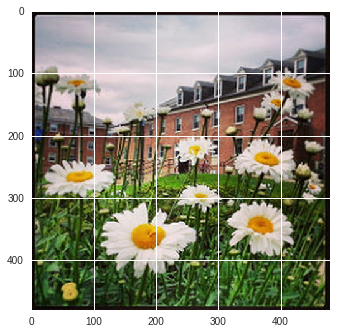

In [7]:
import matplotlib.pyplot as plt
import cv2
path = '/content/gdrive/My Drive/machine_learning/'
image = cv2.imread(path+'daisy.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [30]:
# test with dandelion picture
file_name_input = 'roses.jpg'

print(get_prediction(file_name=file_name_input, project_id=project_id_input,  model_id=model_id_input))

payload {
  classification {
    score: 0.9999924898147583
  }
  display_name: "roses"
}



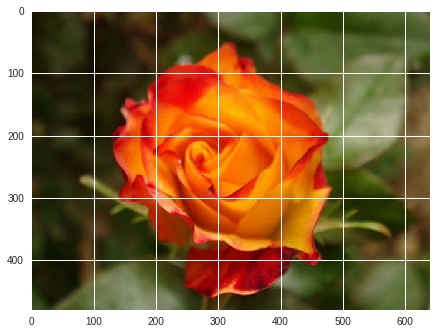

In [14]:
import matplotlib.pyplot as plt
import cv2
path = '/content/gdrive/My Drive/machine_learning/'
image = cv2.imread(path+'roses.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Further Evaluation

* Rose has relatively low recall rate.
![rose precision](https://github.com/xinyanLyu/GCP-AutoML-Vision/blob/master/rose%20precision.png?raw=true)

* Cases of flase negative
![rose recall](https://github.com/xinyanLyu/GCP-AutoML-Vision/blob/master/rose%20recall.png?raw=true)

# Conclusion

### * Overall speaking, the image classification model perform well, and have high precision (>0.95).

###* To tune and optimize the model, we can add more images that are visually similar to false negatives and false positives, ensure they are labeled correctly, and create a new model.

### * If getting labelled training datasets on hand, we can easily perform classification project based on existing knowledge. AutoML Vision allow users to build their own model and predict new items.